In [4]:
#libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
df = web.DataReader('RELIANCE.NS', data_source='yahoo',start='2020-03-01',end='2020-07-04')
#Show data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-02,1369.000000,1301.099976,1355.099976,1316.150024,13486634.0,1311.226562
2020-03-03,1353.900024,1322.000000,1329.699951,1342.849976,12525809.0,1337.826660
2020-03-04,1353.800049,1307.900024,1352.000000,1339.699951,10105782.0,1334.688477
2020-03-05,1357.949951,1306.000000,1352.199951,1311.150024,13948324.0,1306.245239
2020-03-06,1288.150024,1241.099976,1270.000000,1271.000000,15422068.0,1266.245483
...,...,...,...,...,...,...
2020-06-29,1739.750000,1715.550049,1728.050049,1723.150024,11824524.0,1716.704102
2020-06-30,1741.000000,1695.550049,1737.000000,1704.099976,13972563.0,1697.725342
2020-07-01,1749.000000,1708.050049,1720.000000,1737.599976,13136179.0,1731.099976


In [6]:
#Get Number rows and colums
df.shape

(83, 6)

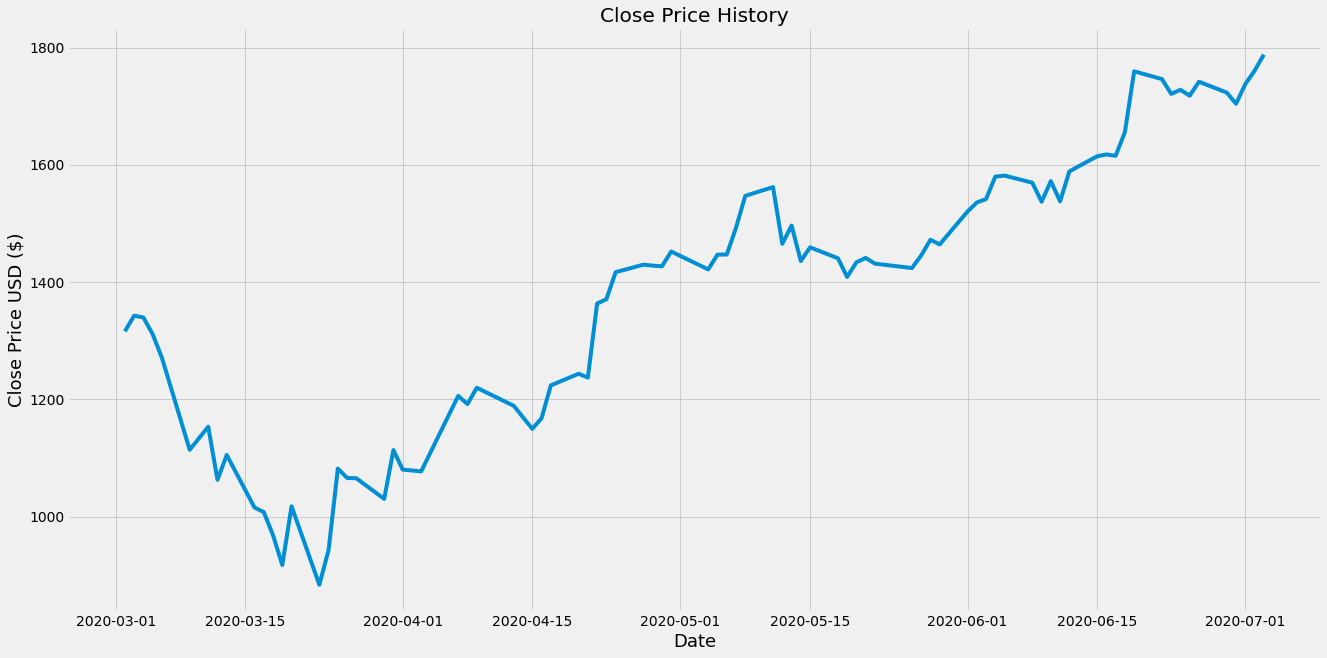

In [7]:
#Graph of closing price
plt.figure(figsize=(20,10))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [8]:
#Create data frame from close
data = df.filter(['Close'])
#dataframe to array
dataset = data.values
#Number of rows to train
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

67

In [9]:
 #scale data
 scaler = MinMaxScaler(feature_range=(0,1))
 scaled_data = scaler.fit_transform(dataset)
 scaled_data

array([[0.47806607],
       [0.50760632],
       [0.5041212 ],
       [0.47253418],
       [0.42811307],
       [0.25457767],
       [0.298169  ],
       [0.1979864 ],
       [0.24478625],
       [0.14565472],
       [0.13713559],
       [0.09343365],
       [0.03722965],
       [0.14814407],
       [0.        ],
       [0.06566359],
       [0.21928418],
       [0.20152675],
       [0.20086295],
       [0.16197373],
       [0.25413509],
       [0.21729264],
       [0.21397351],
       [0.35630909],
       [0.34087517],
       [0.37163241],
       [0.33755604],
       [0.29407532],
       [0.31421148],
       [0.37611329],
       [0.39801963],
       [0.39088341],
       [0.53056366],
       [0.53864028],
       [0.58964429],
       [0.60375061],
       [0.60198043],
       [0.6006527 ],
       [0.62862197],
       [0.59486636],
       [0.62275825],
       [0.62286886],
       [0.67350781],
       [0.73361729],
       [0.75005806],
       [0.64314872],
       [0.67754599],
       [0.610

In [10]:
#train dataset
#scale train data set
train_data = scaled_data[0:training_data_len,:]
#split data in x and y
x_train =[]
y_train =[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.47806607, 0.50760632, 0.5041212 , 0.47253418, 0.42811307,
       0.25457767, 0.298169  , 0.1979864 , 0.24478625, 0.14565472,
       0.13713559, 0.09343365, 0.03722965, 0.14814407, 0.        ,
       0.06566359, 0.21928418, 0.20152675, 0.20086295, 0.16197373,
       0.25413509, 0.21729264, 0.21397351, 0.35630909, 0.34087517,
       0.37163241, 0.33755604, 0.29407532, 0.31421148, 0.37611329,
       0.39801963, 0.39088341, 0.53056366, 0.53864028, 0.58964429,
       0.60375061, 0.60198043, 0.6006527 , 0.62862197, 0.59486636,
       0.62275825, 0.62286886, 0.67350781, 0.73361729, 0.75005806,
       0.64314872, 0.67754599, 0.6106101 , 0.63655475, 0.61592077,
       0.58068265, 0.60812075, 0.61647396, 0.60574215, 0.59744431,
       0.62123144, 0.65077169, 0.64208664, 0.70398845, 0.72097133])]
[0.7275543618711704]

[array([0.47806607, 0.50760632, 0.5041212 , 0.47253418, 0.42811307,
       0.25457767, 0.298169  , 0.1979864 , 0.24478625, 0.14565472,
       0.13713559, 0.09343365, 0.037

In [13]:
#convert x and y to array
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
#reshape
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(7, 60, 1)

In [14]:
#LSTM model
model = Sequential()
model.add(LSTM(50 ,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50 ,return_sequences=False))
model.add(Dense(12))
model.add(Dense(1))

In [15]:
#Compile 
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [16]:
#train
model.fit(x_train, y_train, batch_size=1, epochs=1)

7/7 [==============================] - 0s 19ms/step - loss: 0.1222


In [18]:
#test
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [19]:
#Conver data to array
x_test = np.array(x_test)

In [20]:
#reshape 2d to 3d
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [21]:
#Predicted price
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [22]:
#RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

194.58270263671875

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


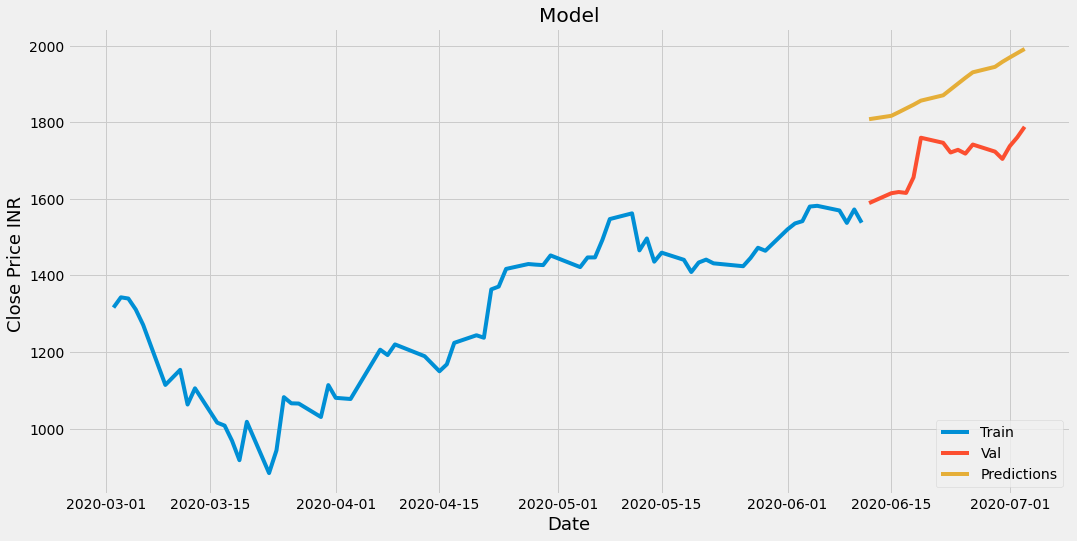

In [23]:
#plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price INR ', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'],loc = 'lower right')
plt.show()

In [24]:
#valid and predicted price
valid

,Close,Predictions
Date,,
2020-06-12,1588.800049,1807.838013
2020-06-15,1614.550049,1816.605347
2020-06-16,1617.699951,1826.064087
2020-06-17,1615.349976,1835.838501
2020-06-18,1655.900024,1845.561890
2020-06-19,1759.400024,1856.229248
2020-06-22,1746.150024,1870.177979
2020-06-23,1720.900024,1885.401855
2020-06-24,1727.849976,1900.613403


In [25]:
apple_quote = web.DataReader('RELIANCE.NS', data_source='yahoo',start='2020-03-01',end='2020-07-04')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values 
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2002.5393]]
